In [157]:
"""Contains function for importing and handling knockout RNAseq data"""
from os.path import join, dirname
import pandas as pd

def importRNAseqKO():
    data = pd.read_csv("data/rpmCounts_allRuns_matrix.tsv.xz", index_col = "GeneSymbol", delim_whitespace = True)
    data = data.drop(["gene_id"], axis=1) # using GeneSymbol as index
    data = data.dropna(axis=1) # remove columns with no measurements
    return data

In [158]:
data = importRNAseqKO()
data

,ADCK3-PKc-E12-108-8,ADCK3-PKc-E13-66-1,ADCK3-PKc-E8-141-23,BRD2-BD1-e4-60-1,BRD2-BD1-e4-60-3,BRD2-BD2-e6-145-6,BRD2-BD2-e7-129-0,BRD2-BD2-e7-129-7,BRD8-BD-e17-77-2,BRD8-BD-e18-69-2,...,ZBTB17-E8-143-17,ZEB2-E10-131-7,ZEB2-E8-1970-33,ZEB2-E8-1970-34,ZFP57-E4-768-119,ZFP57-E4-768-120,ZFP57-E4-768-6,ZFX-E10-1119-23,ZFX-E10-1119-45,ZFX-E10-1119-67
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,32.364860,27.266637,27.574135,32.755454,30.525122,26.043635,24.258734,33.393641,32.439840,26.379196,...,27.401484,27.580635,22.517949,24.308311,31.633275,26.684860,28.451955,29.318201,32.441373,26.927686
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,85.632025,75.470155,71.932527,80.554154,92.263901,77.439482,72.776203,80.383264,64.224329,69.051424,...,71.963493,67.980437,69.106810,62.068793,73.044107,70.730953,70.103272,78.638539,126.409487,69.138652
SCYL3,15.508162,13.146414,12.947855,14.557980,10.098536,10.601834,17.810210,12.164826,15.073057,14.741315,...,12.178437,12.819168,5.047127,10.620136,12.940885,14.467695,14.372637,15.618107,14.822351,16.738832
C1orf112,15.508162,16.554744,12.468305,14.800613,15.377317,15.441801,14.739484,18.127976,10.157930,23.663690,...,11.901655,8.546112,10.482494,15.812202,18.404814,11.574156,12.906042,16.166111,28.526035,14.555506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-180C16.1,1.348536,0.243452,0.239775,0.485266,0.459024,0.230475,0.307073,0.000000,1.310701,0.000000,...,0.553565,0.776919,0.388241,0.000000,0.575150,0.643009,0.293319,1.096008,0.279667,0.000000
TSEN34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-138A9.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [159]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
import numpy as np

#------------------------- Perform PCA using sklearn
def pca(data,num_components):
    "Function takes in parameter for number of components. Returns list containing: [PCA object, fitted model]"
    pca = PCA(n_components=num_components)
    X_r = pca.fit(data).transform(data)
    return [pca, X_r]

#-------------------------- Calculate cumulative variance based on number of PCs included and create r2x plot
def r2x(num_components, pca):
    """Function creates r2x plot comparing number of components to % variance captured.
    Parameters include: number of components, pca object from pca()"""
    total_variance = np.array([])
    tot = 0.0
    for i in range(0,num_components):
        tot += pca.explained_variance_ratio_[i]
        total_variance = np.append(total_variance, tot)

    fig = plt.figure(figsize = (8,8))
    ax = plt.subplot(111) 
    ax.set_xlabel("Number of PCs", fontsize = 15)
    ax.set_ylabel("% Variance", fontsize = 15)
    plt.xticks(np.arange(num_components+1))
    plt.plot(list(range(1,num_components+1)),total_variance)
    ax.grid()
    plt.title("r2x Plot", fontsize = 18)
    

In [179]:
pca_list = pca(data.T,10)
#r2x(10, pca_list[0])
X_r = pca_list[1]
KO_genes = list(list(zip(*data.columns.str.split("-")))[0])
KO_genes_unique = list(set(list(list(zip(*data.columns.str.split("-")))[0])))
df = pd.DataFrame(X_r)
df["KO Gene"] = KO_genes

,0,1,2,3,4,5,6,7,8,9,KO Gene
0,-1431.404238,160.327598,352.555571,6.937638,159.918050,35.882971,-459.871651,-171.141221,732.309616,18.566996,ADCK3
1,2176.163559,468.098847,-1377.484705,-2154.486092,-2171.238690,-475.519710,1152.792751,-113.871523,-218.626834,-362.167281,ADCK3
2,-2702.239980,469.272991,803.328440,-307.567742,-309.688126,-163.858879,-358.778213,780.370865,58.767434,455.018583,ADCK3
3,-1476.908505,512.796601,422.624604,-1472.829889,1010.823111,52.280083,-1298.697487,282.600755,1875.163443,-682.154982,BRD2
4,-894.068303,-108.485109,-78.380755,-135.706272,371.465021,142.059587,-19.301154,2774.272230,-1605.642864,-297.846712,BRD2
...,...,...,...,...,...,...,...,...,...,...,...
256,-3702.118551,442.718355,1344.075241,-184.143187,1235.462011,23.983084,-1532.927295,-2.680828,1334.149168,-271.469402,ZFP57
257,-3319.241474,364.587632,1103.274506,-23.032008,937.786318,-36.117968,-553.675438,-340.400180,275.776025,-186.156949,ZFP57
258,-950.203402,-145.085596,132.075090,444.741799,142.536290,-106.790020,-643.669450,-234.898015,976.026328,-243.273327,ZFX
259,10734.370606,-1414.620247,-4501.087627,-371.295794,1146.770533,72.806329,128.565914,244.277089,1774.724524,1726.178208,ZFX


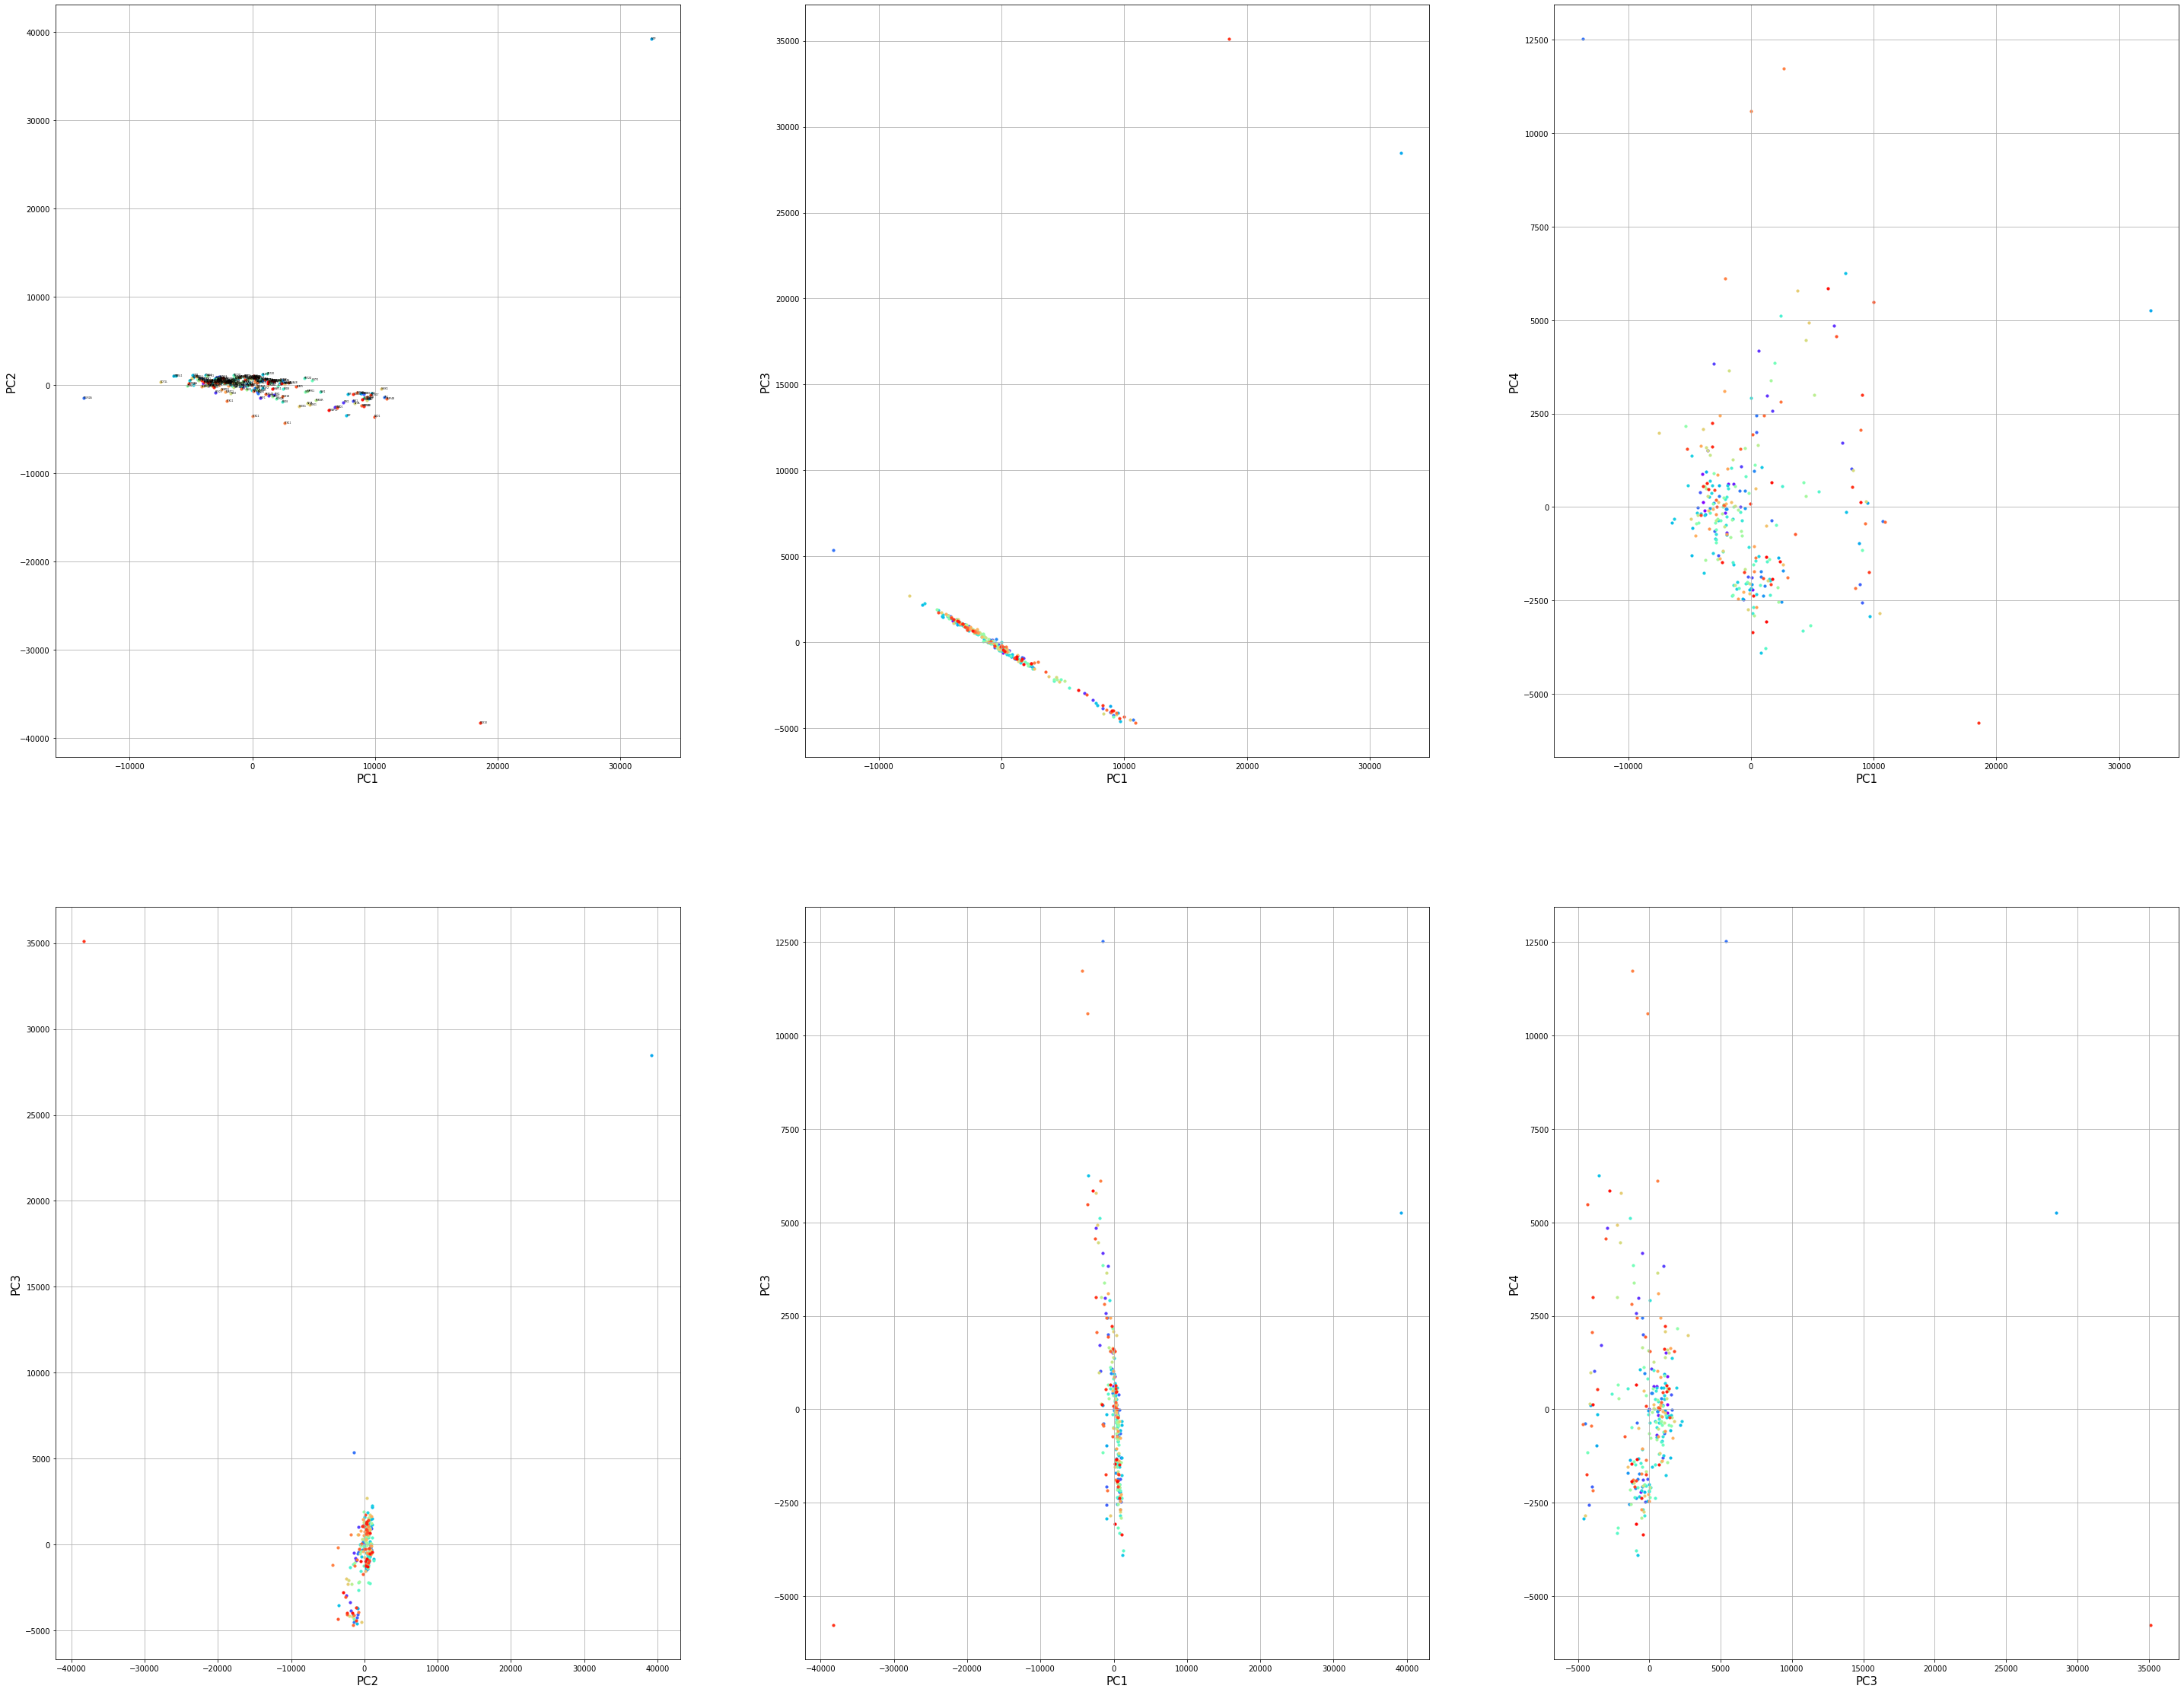

In [201]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

#-------------------------- Create PC plots

# Set the color map to match the number of species
z = range(1,len(KO_genes_unique))
rainbow = plt.get_cmap('rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=len(KO_genes_unique))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)

fig = plt.figure(figsize=(50,40))
# PC1 vs PC2
ax = plt.subplot(231)
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC2", fontsize = 15)
for i in range(len(KO_genes_unique)):
    indx = df["KO Gene"] == KO_genes_unique[i]
    plt.scatter(df.iloc[:,0][indx], df.iloc[:,1][indx], s=10, color=scalarMap.to_rgba(i), label=KO_genes_unique[i])
ax.grid()
for i, txt in enumerate(KO_genes):
    ax.annotate(txt, (df.iloc[i,0], df.iloc[i,1]), fontsize=3)

# PC1 vs PC3
ax = plt.subplot(232)
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC3", fontsize = 15)
for i in range(len(KO_genes_unique)):
    indx = df["KO Gene"] == KO_genes_unique[i]
    plt.scatter(df.iloc[:,0][indx], df.iloc[:,2][indx], s=10, color=scalarMap.to_rgba(i), label=KO_genes_unique[i])
ax.grid()
for i, txt in enumerate(KO_genes):
    ax.annotate(txt, (df.iloc[i,0], df.iloc[i,2]), fontsize=3)

# PC1 vs PC4
ax = plt.subplot(233)
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC4", fontsize = 15)
for i in range(len(KO_genes_unique)):
    indx = df["KO Gene"] == KO_genes_unique[i]
    plt.scatter(df.iloc[:,0][indx], df.iloc[:,3][indx], s=10, color=scalarMap.to_rgba(i), label=KO_genes_unique[i])
ax.grid()
for i, txt in enumerate(KO_genes):
    ax.annotate(txt, (df.iloc[i,0], df.iloc[i,3]), fontsize=3)

# PC2 vs PC3
ax = plt.subplot(234)
ax.set_xlabel("PC2", fontsize = 15)
ax.set_ylabel("PC3", fontsize = 15)
for i in range(len(KO_genes_unique)):
    indx = df["KO Gene"] == KO_genes_unique[i]
    plt.scatter(df.iloc[:,1][indx], df.iloc[:,2][indx], s=10, color=scalarMap.to_rgba(i), label=KO_genes_unique[i])
ax.grid()
for i, txt in enumerate(KO_genes):
    ax.annotate(txt, (df.iloc[i,1], df.iloc[i,2]), fontsize=3)

# PC2 vs PC4
ax = plt.subplot(235)
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC3", fontsize = 15)
for i in range(len(KO_genes_unique)):
    indx = df["KO Gene"] == KO_genes_unique[i]
    plt.scatter(df.iloc[:,1][indx], df.iloc[:,3][indx], s=10, color=scalarMap.to_rgba(i), label=KO_genes_unique[i])
ax.grid()
for i, txt in enumerate(KO_genes):
    ax.annotate(txt, (df.iloc[i,1], df.iloc[i,3]), fontsize=3)

# PC3 vs PC4
ax = plt.subplot(236)
ax.set_xlabel("PC3", fontsize = 15)
ax.set_ylabel("PC4", fontsize = 15)
for i in range(len(KO_genes_unique)):
    indx = df["KO Gene"] == KO_genes_unique[i]
    plt.scatter(df.iloc[:,2][indx], df.iloc[:,3][indx], s=10, color=scalarMap.to_rgba(i), label=KO_genes_unique[i])
ax.grid()
for i, txt in enumerate(KO_genes):
    ax.annotate(txt, (df.iloc[i,2], df.iloc[i,3]), fontsize=3)

In [137]:
import matplotlib.cm as cm
KO_genes = list(set(list(list(zip(*data.columns.str.split("-")))[0])))
colors = cm.rainbow(np.linspace(0, 1, len(KO_genes)))
for target, c in zip(KO_genes, colors):
    indices_to_keep = target in X_r.index
    print(indices_to_keep)
    # ax.scatter(X_r.loc[indices_to_keep, 0], X_r.loc[indices_to_keep, 1], c = color, s = 50)
ax.legend(KO_genes)
ax.grid()

NameError: name 'targets' is not defined